In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from sklearn import datasets
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold,cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import california housing data from sklearn and store data into a variable
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [3]:
# define the columns names of the data then convert to dataframe
a_mpg = pd.DataFrame(calidata, columns=calihouses.feature_names)
# adding target
a_mpg['target']=calihouses.target
# print the df and shape to get a better understanding of the data
a_mpg.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


###### Performing EDA

In [4]:
a_mpg.shape

(20640, 9)

In [5]:
# checking data type
a_mpg.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [6]:
#checking unique value in each row
a_mpg.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
target         3842
dtype: int64

In [7]:
# checking null value
a_mpg.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

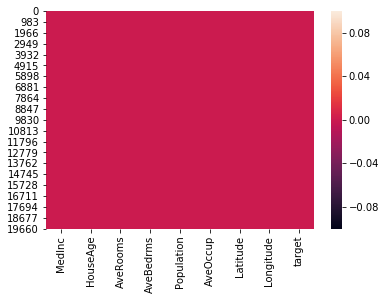

In [8]:
# heatmap of null value
sns.heatmap(a_mpg.isnull())

In [9]:
# checking the data description
a_mpg.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
# corelation between coloums
a_mpg.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


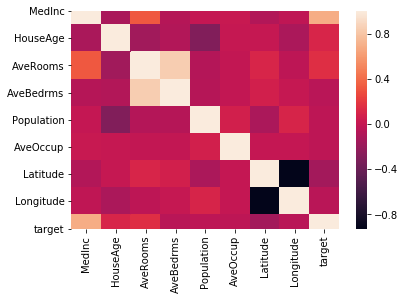

In [11]:
# heat map of corelation
sns.heatmap(a_mpg.corr())

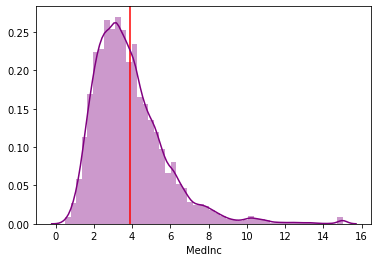

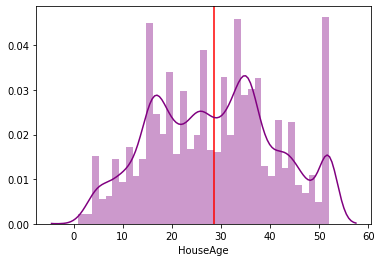

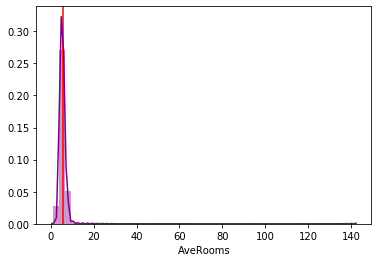

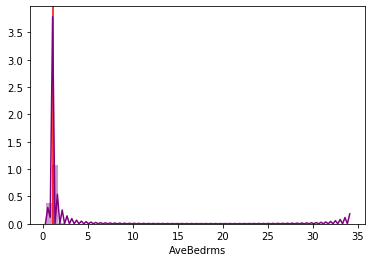

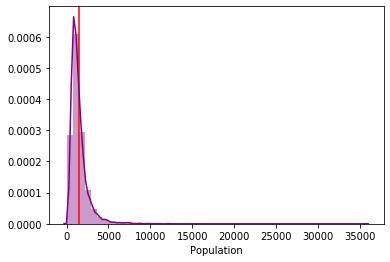

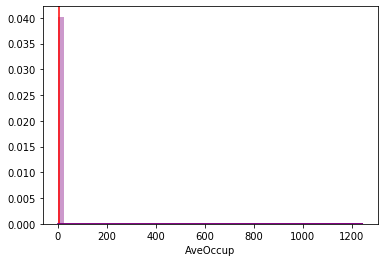

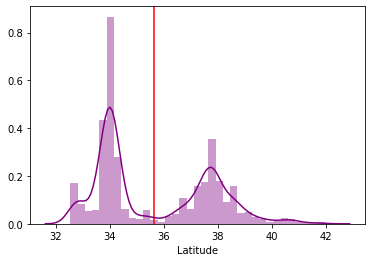

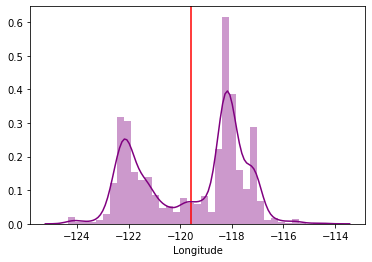

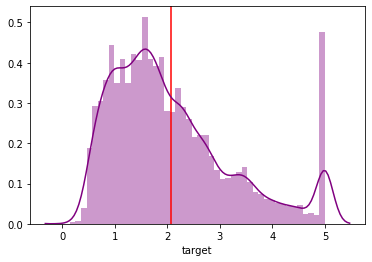

In [12]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(a_mpg):
    plt.figure(i)
    plt.axvline(a_mpg[col].mean(),color = 'r')
    sns.distplot(a_mpg[col],color='purple')

MedInc           AxesSubplot(0.125,0.772143;0.227941x0.107857)
HouseAge      AxesSubplot(0.398529,0.772143;0.227941x0.107857)
AveRooms      AxesSubplot(0.672059,0.772143;0.227941x0.107857)
AveBedrms        AxesSubplot(0.125,0.642714;0.227941x0.107857)
Population    AxesSubplot(0.398529,0.642714;0.227941x0.107857)
AveOccup      AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Latitude         AxesSubplot(0.125,0.513286;0.227941x0.107857)
Longitude     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
target        AxesSubplot(0.672059,0.513286;0.227941x0.107857)
dtype: object

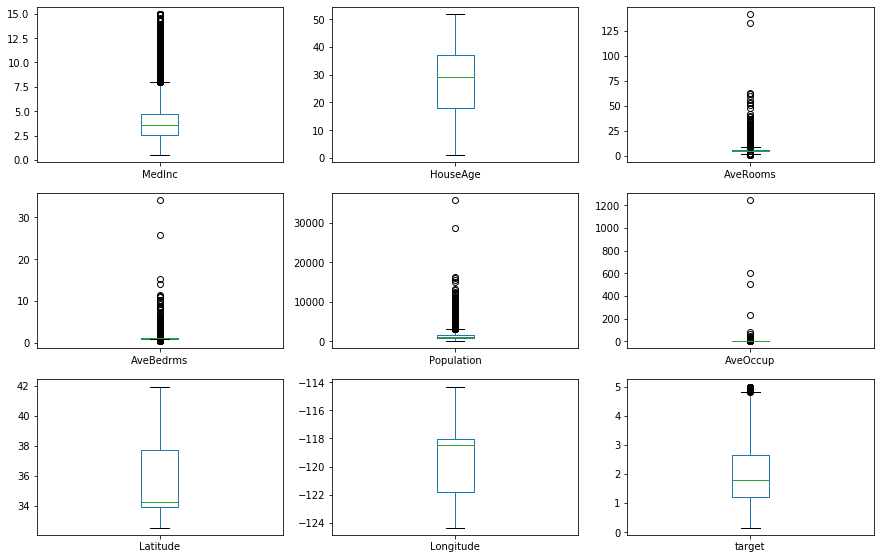

In [13]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
a_mpg.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

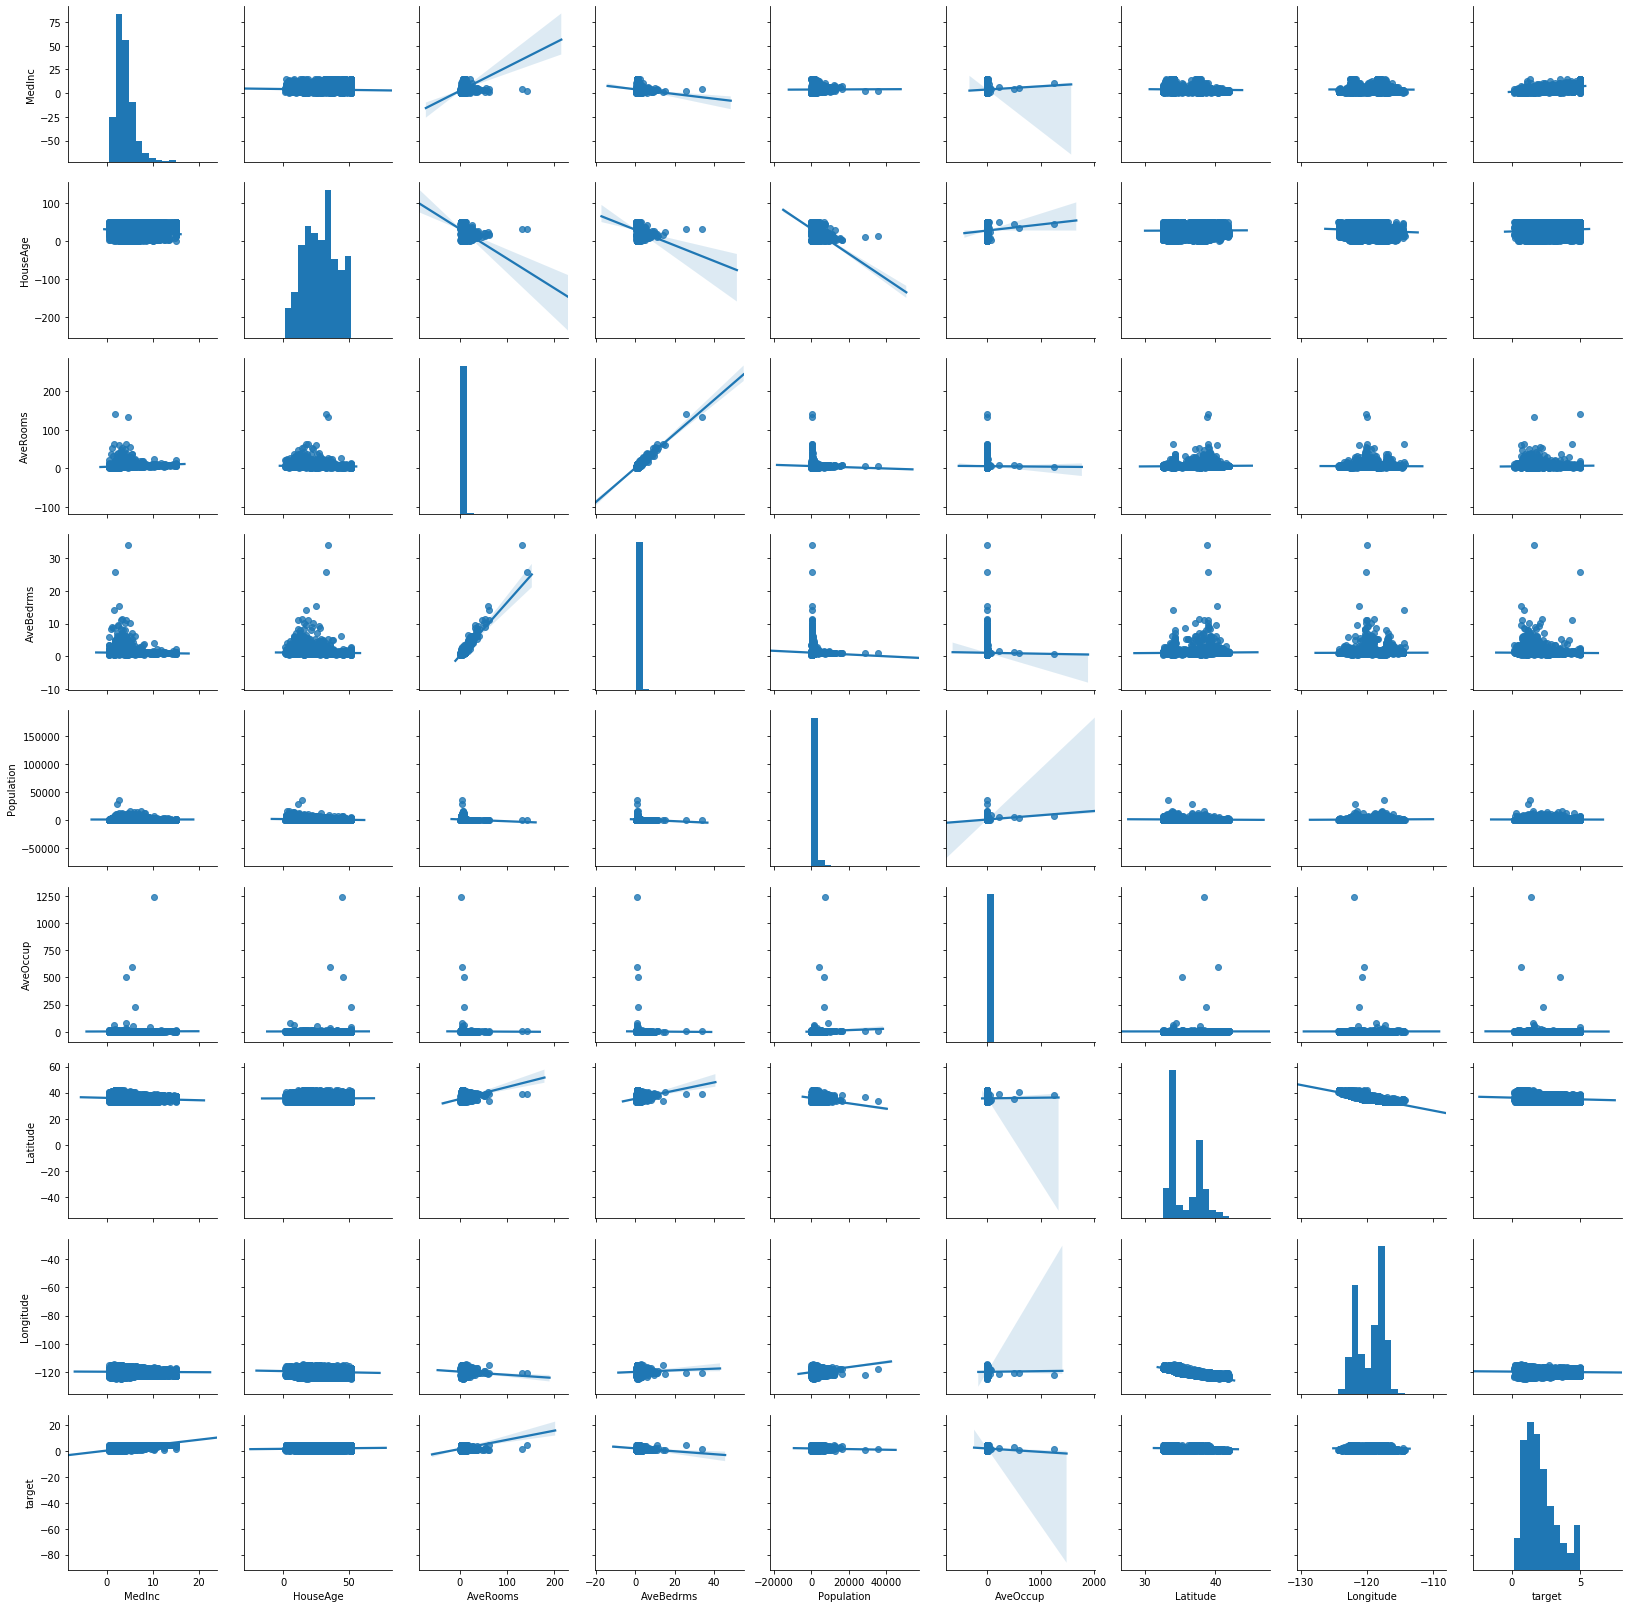

In [14]:
# pair plot to see the scatter of data
sns.pairplot(a_mpg,kind='reg')

###### Manipulating data before bulding the model

In [15]:
#checking skewness
a_mpg.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

In [16]:
for col in a_mpg.columns:
    if a_mpg.skew().loc[col]>0.55:
        a_mpg[col]=np.log1p(a_mpg[col])
a_mpg.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
target        0.275939
dtype: float64

In [17]:
#removing outlires
z=abs(zscore(a_mpg))
print(a_mpg.shape)
a_mpg=a_mpg.loc[(z<3).all(axis=1)]
print(a_mpg.shape)

(20640, 9)
(19876, 9)


In [18]:
# dividing dataset into input values 'x' and output value 'y'
x = a_mpg.drop(['target'],axis=1)
print('x dataset\n',x.head(),'\n')
y=a_mpg['target']
print('y datase\n',y.sample(5))
print(x.shape)
print(y.shape)

x dataset
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.232720      41.0  2.077455   0.704982    5.777652  1.268511     37.88   
1  2.230165      21.0  1.979364   0.678988    7.784057  1.134572     37.86   
2  2.111110      52.0  2.228738   0.729212    6.208590  1.335596     37.85   
3  1.893579      52.0  1.919471   0.729025    6.326149  1.266369     37.85   
4  1.578195      52.0  1.985385   0.732888    6.338594  1.157342     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25   

y datase
 7249     1.018125
2060     0.639219
4185     1.050122
16351    1.118742
1618     1.641905
Name: target, dtype: float64
(19876, 8)
(19876,)


In [19]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

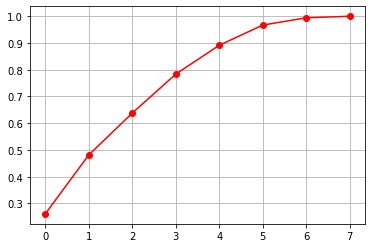

In [20]:
# using pca to find out the variance ratio for dimensionality-reduction
pca=PCA()
train_x=pca.fit(x)

plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

we will not use pca for dimensionality-reduction since this does'nt have much effect

###### Bulding and comparing multipe regression model, to find out the best model

In [21]:
#creating models array with all the model
Models=[('Ridge',Ridge()),('GradientBoostingRegressor',GradientBoostingRegressor(random_state=5)),('ElasticNet',ElasticNet()),
        ('Lasso',Lasso(random_state=29)),('SGDRegressor',SGDRegressor()),('DecisionTreeRegressor',DecisionTreeRegressor(random_state=5)),
        ('KNeighborsRegressor',KNeighborsRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('LinearRegression',LinearRegression()),('SVR',SVR())]

In [22]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array=[]
Random_state=[]
Max_r2score_array=[]
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [23]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
7,RandomForestRegressor,0.838546,76
1,GradientBoostingRegressor,0.826714,59
9,SVR,0.823203,59
6,KNeighborsRegressor,0.758656,59
8,LinearRegression,0.722089,49
0,Ridge,0.722087,49
4,SGDRegressor,0.721477,49
5,DecisionTreeRegressor,0.712002,68
2,ElasticNet,0.000000,59
3,Lasso,0.000000,59


###### Conclusion
On basis of r2 score RandomForestRegressor model is performing the best with maximum r2 score, closely followed by GradientBoostingRegressor and SVR model

In [24]:
# loop to find out the cross_val_score for r2 of all the model in models array
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='r2')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [25]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
9,SVR,0.689746,0.088796
1,GradientBoostingRegressor,0.662484,0.108067
4,SGDRegressor,0.610285,0.061373
0,Ridge,0.609537,0.059954
8,LinearRegression,0.609537,0.059940
7,RandomForestRegressor,0.608736,0.142889
6,KNeighborsRegressor,0.541759,0.178525
5,DecisionTreeRegressor,0.290167,0.197283
2,ElasticNet,-0.286998,0.348943
3,Lasso,-0.286998,0.348943


###### Conclusion
On basis of cross val score SVR model is performing the best with maximum cross val score.

###### On basis of our compression of r2 and Cross val score i choose SVR model since it performing best on given data

In [26]:
#using grid search to improve result for GradientBoostingRegressor model
kfoldr =KFold(n_splits=10,random_state=5)
param_grid={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
mod=SVR()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [27]:
grid_result.best_score_

0.6870285674653124

In [28]:
grid_result.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [29]:
grid_result.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
# final model
svc=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=59,shuffle=True)

svc.fit(train_x,train_y)
pred_r=svc.predict(test_x)
score_r=cross_val_score(svc,x,y,cv=10,scoring='r2').mean()

print('Model score',svc.score(train_x,train_y),'\n')
print('R2 score of model is :' ,r2_score(test_y,pred_r),'\n')
print('The mean of cross_val_score for the model is:',score_r,'\n')
print('Model intercept',svc.intercept_,'\n')
print('Mean absolute error for model is : ',mean_absolute_error(test_y,pred_r),'\n')
print('Mean squared error for model is : ',mean_squared_error(test_y,pred_r),'\n')
print('Root mean squared error for model is : ',np.sqrt(mean_squared_error(test_y,pred_r)),'\n')

Model score 0.822610400272351 

R2 score of model is : 0.8176371852607276 

The mean of cross_val_score for the model is: 0.6870200968572334 

Model intercept [1.1032437] 

Mean absolute error for model is :  0.11507530272269433 

Mean squared error for model is :  0.023305116998630842 

Root mean squared error for model is :  0.1526601355908963 



In [32]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 13 California housing data.csv')

In [33]:
# saving the model using pickle.
joblib.dump(svc,'svc_Project 13 California housing data..pkl')

['svc_Project 13 California housing data..pkl']